# IMPORTING LIBRARIES AND LOADING DATA

In [2]:
# Importing all the necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [89]:
# Loading the data into the data frame
data = pd.read_csv('marketing_campaign.csv', sep='\t')

# EDA AND DATA CLEANING

In [90]:
# Checking the shape of the dataset
data.shape

(2240, 29)

In [91]:
# Displaying the top 5 rows
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [92]:
# Finding the basic information regarding dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

* Here we have 2 categorical features and the rest is numerical.
* There are missing values in income.
* Dt_Customer is in object dtype, so we need to parse it as datetime.

In [93]:
# Getting various summary statistics of numerical columns
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


* Median value is smaller than mean value in most columns and there is also large difference between 75 percentile
  and max value. It suggests that there are outliers in our dataset.
* There are extreme values in min Year_Birth and max Income.
* Z_CostContact and Z_Revenue have same value in all data points, so we can drop them.

In [94]:
# Dropping irrelevant columns
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

Let's explore our categorical features.

In [95]:
# Checking unique values
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [96]:
# Checking number of unique categories present in the Education
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [97]:
# Checking unique values
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [98]:
# Checking number of unique categories present in the Marital_Status
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

There is inconsistency in Marital_Status column. Let's investigate it further.

In [99]:
#Investigating contradictions in Marital_Status
data[data['Marital_Status'].isin(['YOLO', 'Absurd'])]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,0
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1


It seems that the records with YOLO value are duplicated (even though ID and Respnse values are different)

In [101]:
# Organizing Marital_Starus feature
data['Marital_Status'].replace(['Absurd', 'YOLO', 'Alone'], [np.NaN, np.NaN, 'Single'], inplace=True)

In [102]:
# Double checking
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [103]:
# Checking duplicates
data.duplicated().sum()

0

There are no duplicates found in the dataset, but we saw that there are some.
Let's remove 'ID' and 'Response' column from our data and check again.

In [104]:
# Checking duplicates without 'ID' column
dupli_df =  data[data.iloc[:,1:].duplicated()]
# Checking duplicates without 'ID' and 'Response' column
dupli_df2 =  data[data.iloc[:,1:(data.shape[1]-1)].duplicated()]
print(f'Number of duplicated rows: {dupli_df.shape[0]}')
print(f'Number of duplicated rows with changed "Response" value: {dupli_df2.shape[0] - dupli_df.shape[0]}')
print(f'Total: {dupli_df2.shape[0]}')

Number of duplicated rows: 183
Number of duplicated rows with changed "Response" value: 19
Total: 202


In [105]:
# Total number of rows and columns
data.shape

(2240, 27)

In [106]:
# Dropping the duplicates 
data.drop_duplicates(subset=data.columns[1:(data.shape[1]-1)], inplace=True)

In [107]:
# Total number of rows and columns after dropping
data.shape

(2038, 27)

In [108]:
# Finding the null values
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          3
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [109]:
# Investigating missing values in Income column
data[data['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,0


In [110]:
# Filling missing 'Income' values with mean
data['Income'].fillna((data['Income'].mean()), inplace=True)

In [112]:
# Dropping the rest of missing values
data.dropna(inplace=True)

In [113]:
# Double checking
data.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [114]:
# Parsing 'Dt_Customer' as datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

In [115]:
# Double checking
data['Dt_Customer'].dtype

dtype('<M8[ns]')

In [116]:
# Checking unique year the customers joind the company
data['Dt_Customer'].dt.year.value_counts()

2013    1082
2014     511
2012     442
Name: Dt_Customer, dtype: int64

The data contains information on customers who joined the company between 2012 and 2014.

In [117]:
# Renaming some columns for readability
data.rename(columns={'Dt_Customer': 'Enrollment_Date', 'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meats'\
                    , 'MntFishProducts': 'Fishes', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'}, inplace=True)

In [118]:
# Double checking
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Date,Recency,Wines,Fruits,Meats,Fishes,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [119]:
# Displaying column names
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Enrollment_Date', 'Recency', 'Wines', 'Fruits', 'Meats',
       'Fishes', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [120]:
# Preparing dataset with continuous features
numeric_df = data.drop(['ID','Education', 'Marital_Status','Kidhome','Teenhome', 'Enrollment_Date', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'], axis=1)
len(numeric_df.columns)

14

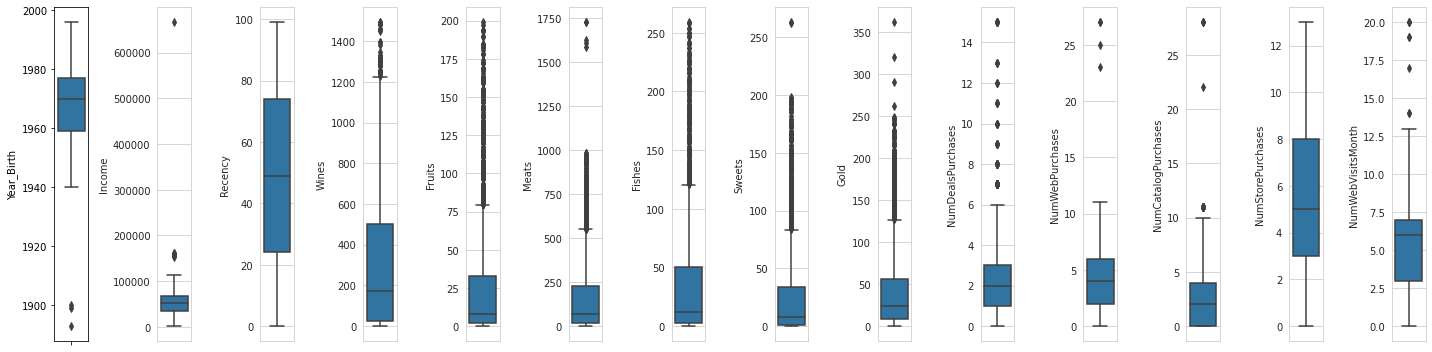

In [121]:
# Detecting Outliers
plt.figure(figsize=(20,5))
for (i, col) in enumerate(numeric_df.columns):
    plt.subplot(1,14,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=numeric_df[col])
    plt.tight_layout()

* We have outliers in Year_Birth and Income column to take care of.
* The rest of outliars seems to be resonable. It's normal that some customers shop more often and spend more money than the       others.

In [122]:
# Checking outliars in Year_Birth column
data['Year_Birth'].sort_values()

239     1893
339     1899
192     1900
1950    1940
424     1941
        ... 
2213    1995
696     1995
747     1995
1170    1996
46      1996
Name: Year_Birth, Length: 2035, dtype: int64

In [123]:
# Total number of rows and columns
data.shape

(2035, 27)

In [124]:
# Dropping outliars
data = data.loc[data['Year_Birth'] > 1900]
# Double checking
data.shape

(2032, 27)

In [125]:
# Checking outliars in Income column
data['Income'].sort_values(ascending=False).head()

2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
Name: Income, dtype: float64

In [126]:
# Dropping outliars
data = data.loc[data['Income'] < 666666.0]
# Double checking
data.shape

(2031, 27)

## Feature Engineering

Features to create:
* Enrollment_Age - Customer's age when joined the company (Extracted from Year_Birth and Enrollment_Date)
* Total_Amount - The amount customer spent in all sectors over the span of two years
* Total_Purchases - Number of purchases made by customer
* Total_Accepted - Number of accepted campaignes

In [128]:
data['Enrollment_Age'] = data['Enrollment_Date'].dt.year - data['Year_Birth']
data['Total_Amount'] = data.loc[:, ['Wines','Fruits','Meats','Fishes','Sweets','Gold']].sum(axis=1)
data['Total_Purchases'] = data.loc[:, ['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)
data['Total_Accepted'] = data.loc[:, ['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2']].sum(axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Enrollment_Date,Recency,Wines,Fruits,Meats,Fishes,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Enrollment_Age,Total_Amount,Total_Purchases,Total_Accepted
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,55,1617,22,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,60,27,4,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,48,776,20,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,30,53,6,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,33,422,14,0


In [129]:
# Creating age grouping function
def group_by_age(age):
    if age < 30:
        return '16-29'
    elif 40 > age >= 30:
        return '30-39'
    elif 50 > age >= 40:
        return '40-49'
    elif 60 > age >= 50:
        return '50-59'
    else:
        return '60+'

In [130]:
# Creating age groups
data['Age_Group'] = data['Enrollment_Age'].map(group_by_age)

In [131]:
# Investigating Age_Group
data['Age_Group'].value_counts()

40-49    597
30-39    536
50-59    426
60+      250
16-29    222
Name: Age_Group, dtype: int64

## Distribution and correlation matrix

In [139]:
len(data.columns)

32

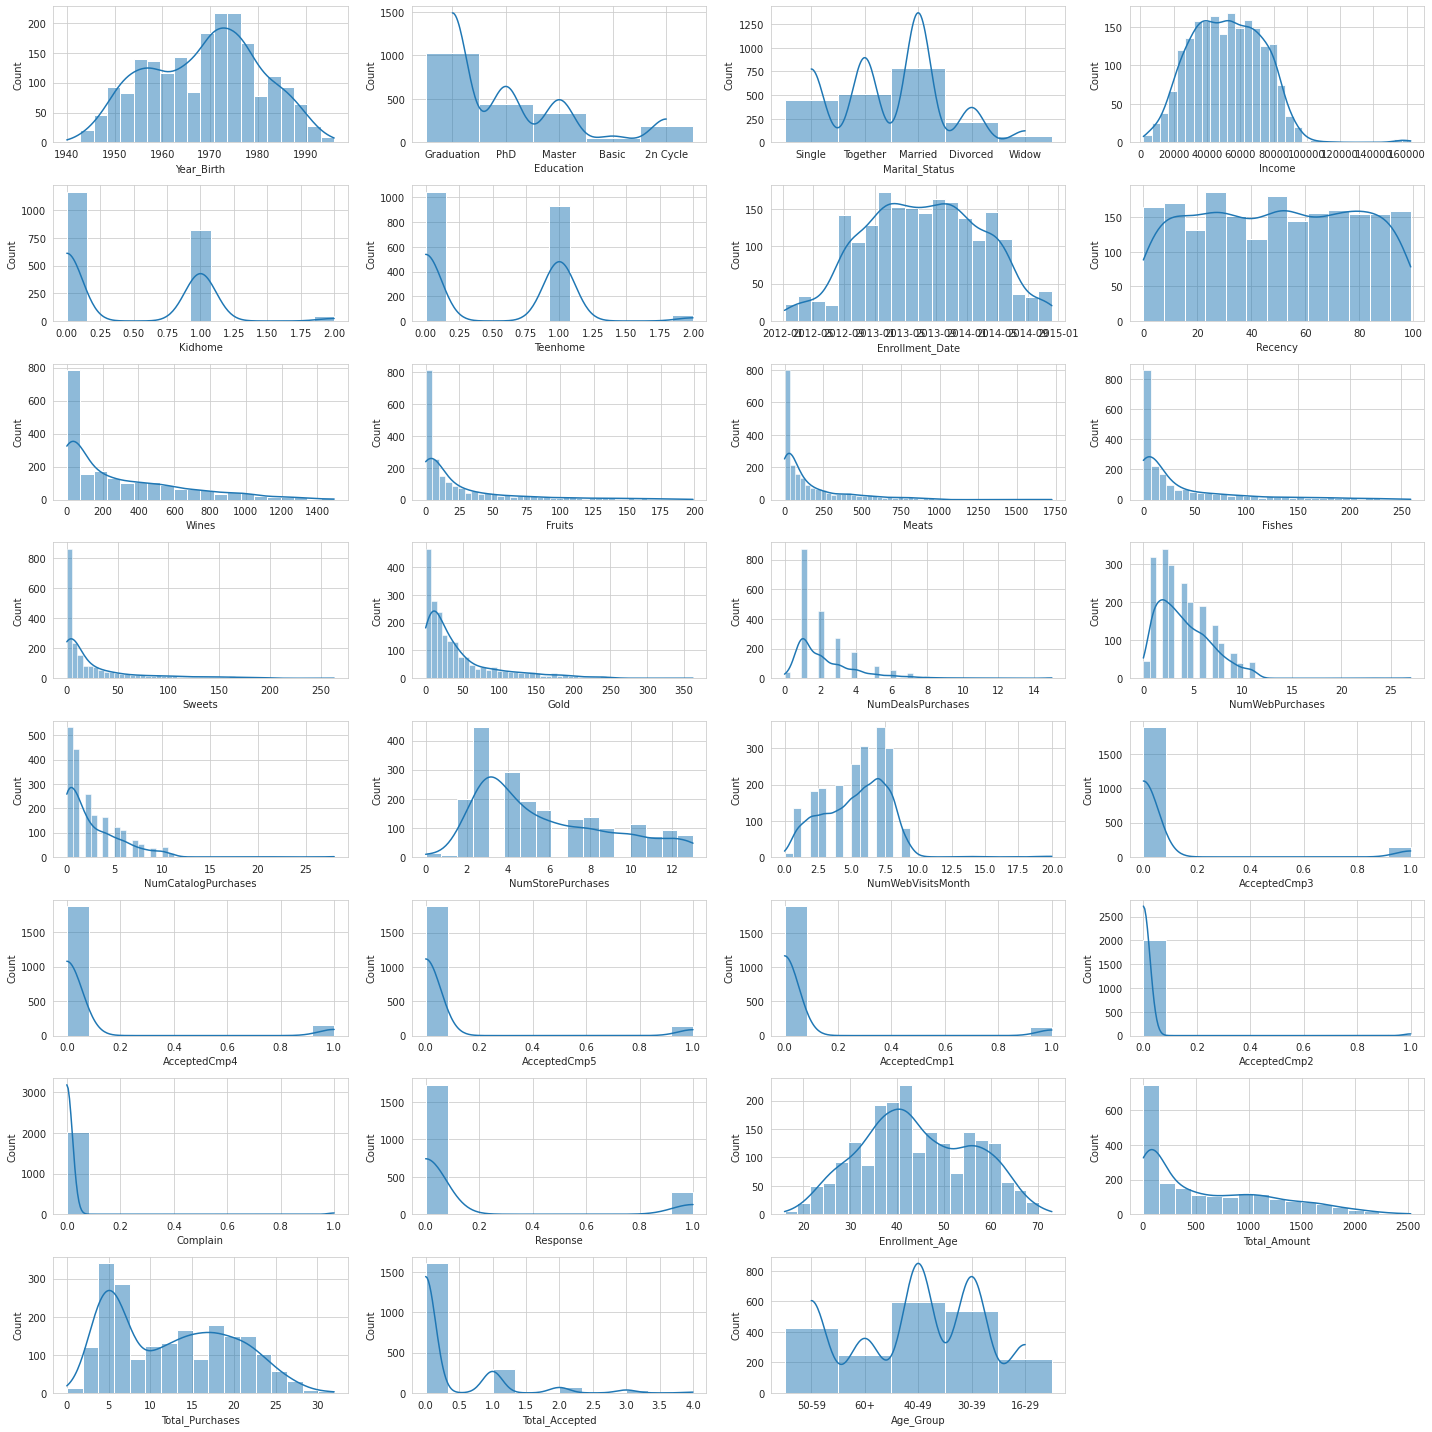

In [138]:
plt.figure(figsize=(20,20))
for (i, col) in enumerate(data.columns[1:]):
    plt.subplot(8,4,i+1)
    sns.histplot(data[col], kde=True)
    plt.tight_layout()

<AxesSubplot:>

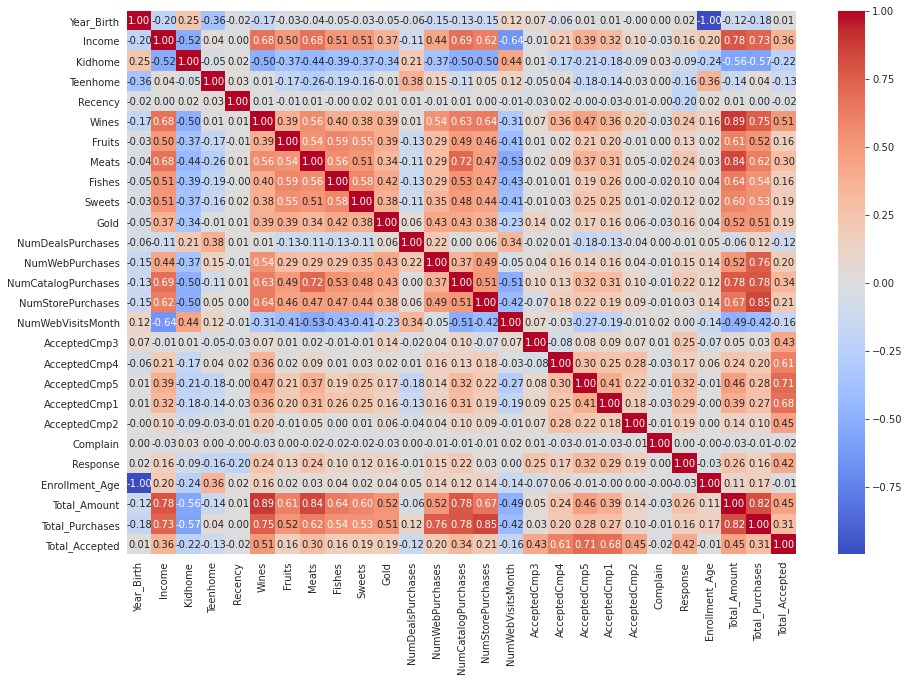

In [140]:
plt.figure(figsize=(15,10))
sns.heatmap(data.set_index('ID').corr(), cmap='coolwarm', annot=True, fmt='.2f')

# Visualisation

In [443]:
marital_pie = data.groupby('Marital_Status')[['ID']].count().reset_index()
edu_pie = data.groupby('Education')[['ID']].count().reset_index()

pie_rgb = sns.color_palette(n_colors=5)
marital_labels = np.array(marital_pie['Marital_Status'])
marital_color_map = dict(zip(marital_labels, pie_rgb))
edu_labels = np.array(edu_pie['Education'])
edu_color_map = dict(zip(edu_labels, pie_rgb))

age_bar = data.groupby('Age_Group')[['ID']].count().reset_index()
age_rgb = sns.color_palette("YlGn", 5) 
age_labels = np.array(age_bar['Age_Group'])
age_color_map = dict(zip(age_labels, age_rgb))

kid_bar = data.groupby('Kidhome')[['ID']].count().reset_index()
teen_bar = data.groupby('Teenhome')[['ID']].count().reset_index()
kid_rgb = sns.color_palette('OrRd',3)
kid_labels = np.array(kid_bar['Kidhome'])
kid_color_map = dict(zip(kid_labels, kid_rgb))

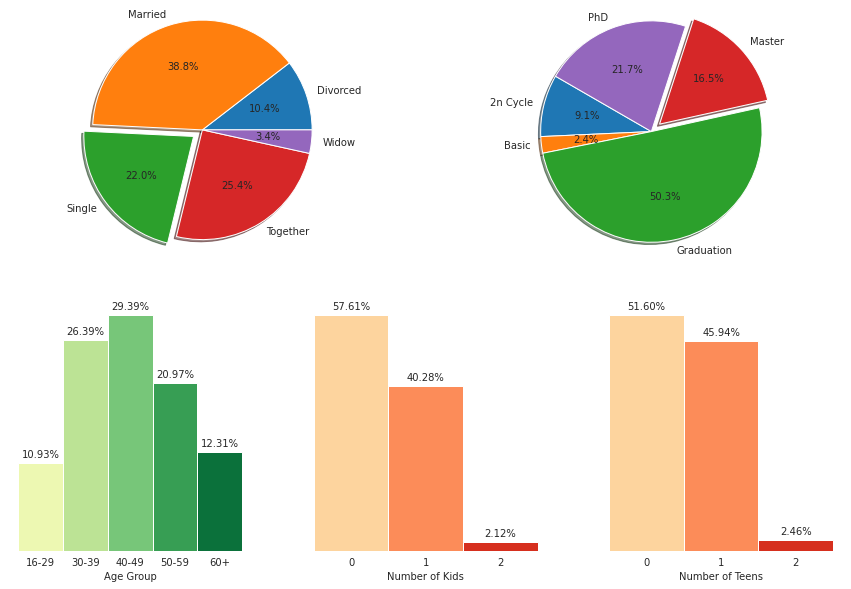

In [445]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(2,2,1)
explode = (0, 0, 0.1, 0, 0)
ax1.pie(marital_pie['ID'], labels=marital_pie['Marital_Status'], explode=explode, colors=pie_rgb, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')

ax2 = fig.add_subplot(2,2,2)
explode = (0, 0, 0, 0.1, 0)
ax2.pie(edu_pie['ID'], labels=edu_pie['Education'], explode=explode, colors=pie_rgb, startangle=150, shadow=True, autopct='%1.1f%%')
ax2.axis('equal')

ax3 = fig.add_subplot(2,3,4)
ax3.bar(age_bar['Age_Group'], age_bar['ID'], width=1, color=age_rgb)
ax3.grid(None)
ax3.set_yticks([])
ax3.set_xlabel('Age Group')
ax3.set_frame_on(False)
for bar in ax3.patches:
    ax3.annotate(text="{:.2%}".format(bar.get_height() / data.shape[0]),
                       xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    
ax4 = fig.add_subplot(235, frameon=False, yticks=[], xticks=[0,1,2] )
ax4.bar(kid_bar['Kidhome'], kid_bar['ID'], width=1, color=kid_rgb)
ax4.grid(None)
ax4.set_xlabel('Number of Kids')
for bar in ax4.patches:
    ax4.annotate(text="{:.2%}".format(bar.get_height() / data.shape[0]),
                       xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    

ax5 = fig.add_subplot(236, frameon=False, yticks=[], sharex=ax4)
ax5.bar(teen_bar['Teenhome'], teen_bar['ID'], width=1, color=kid_rgb)
ax5.grid(None)
ax5.set_xlabel('Number of Teens')
for bar in ax5.patches:
    ax5.annotate(text="{:.2%}".format(bar.get_height() / data.shape[0]),
                       xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                       ha='center', va='center',
                       size=10, xytext=(0, 8),
                       textcoords='offset points')
    
plt.show()

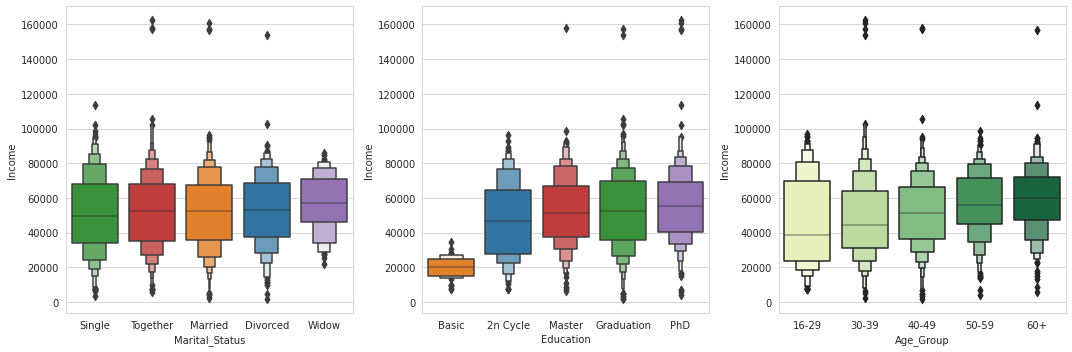

In [446]:
plt.figure(figsize=(15,5))

plt.subplot(131)
sns.boxenplot(x='Marital_Status', y='Income', data=data, palette=marital_color_map)

plt.subplot(132)
sns.boxenplot(x='Education', y='Income', data=data, order=['Basic','2n Cycle', 'Master', 'Graduation', 'PhD'], palette=edu_color_map)

plt.subplot(133)
sns.boxenplot(x='Age_Group', y='Income', data=data.sort_values(by='Age_Group'), palette=age_rgb)

plt.tight_layout()

<AxesSubplot:xlabel='Income', ylabel='Density'>

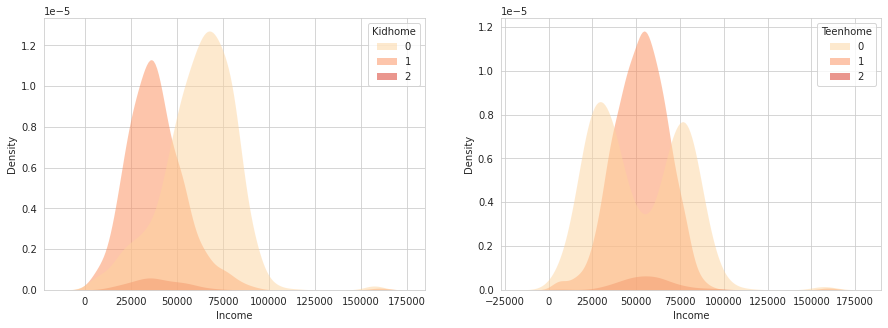

In [471]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.kdeplot(data=data, x='Income', hue='Kidhome', palette=kid_color_map, fill=True, alpha=.5, linewidth=0)

plt.subplot(122)
sns.kdeplot(data=data, x='Income', hue='Teenhome', palette=kid_color_map, fill=True, alpha=.5, linewidth=0)

In [529]:
products_df = pd.DataFrame(data.loc[:,['Wines','Fruits','Meats','Fishes','Sweets','Gold']].sum(axis=0).reset_index())
products_df.rename(columns={'index':'Products', 0:'Total'}, inplace=True)

In [530]:
products_df

,Products,Total
0,Wines,616669
1,Fruits,53387
2,Meats,340761
3,Fishes,75814
4,Sweets,55346
5,Gold,88494


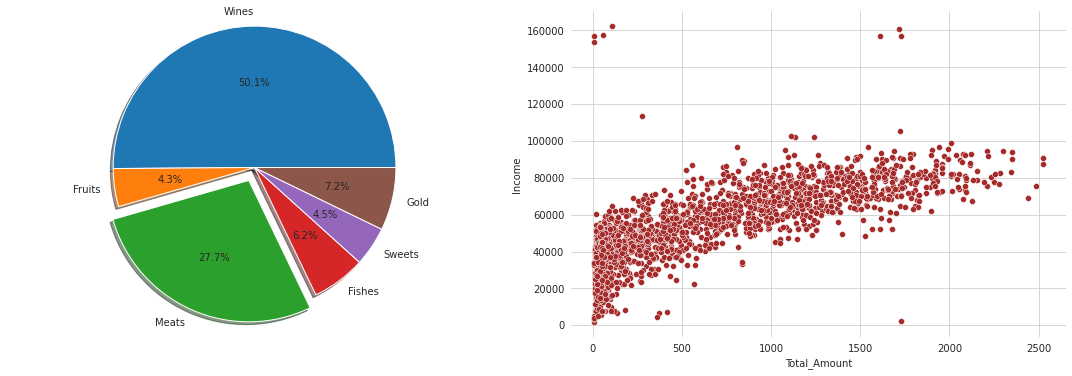

In [555]:
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
explode = (0, 0, 0.1, 0, 0, 0)
ax1.pie(products_df['Total'], labels=products_df['Products'], explode=explode, shadow=True, autopct='%1.1f%%')
ax1.axis('equal')

ax2 = fig.add_subplot(222)
sns.scatterplot(x='Total_Amount', y='Income',  data=data, color='brown')
sns.despine(top=True, right=True, left=True, bottom=True)

plt.tight_layout()

In [557]:
marital_df =  data.groupby('Marital_Status')[['Wines','Fruits','Meats','Fishes','Sweets','Gold', 'Total_Amount']].mean().round(2).reset_index()
marital_df

,Marital_Status,Wines,Fruits,Meats,Fishes,Sweets,Gold,Total_Amount
0,Divorced,325.25,27.38,151.53,34.24,26.42,45.83,610.66
1,Married,300.15,25.95,162.84,35.58,26.87,42.78,594.17
2,Single,287.81,26.49,178.36,37.57,27.23,43.97,601.43
3,Together,303.73,25.28,168.85,39.01,26.52,41.81,605.21
4,Widow,377.33,32.81,197.34,52.46,39.50,56.07,755.51


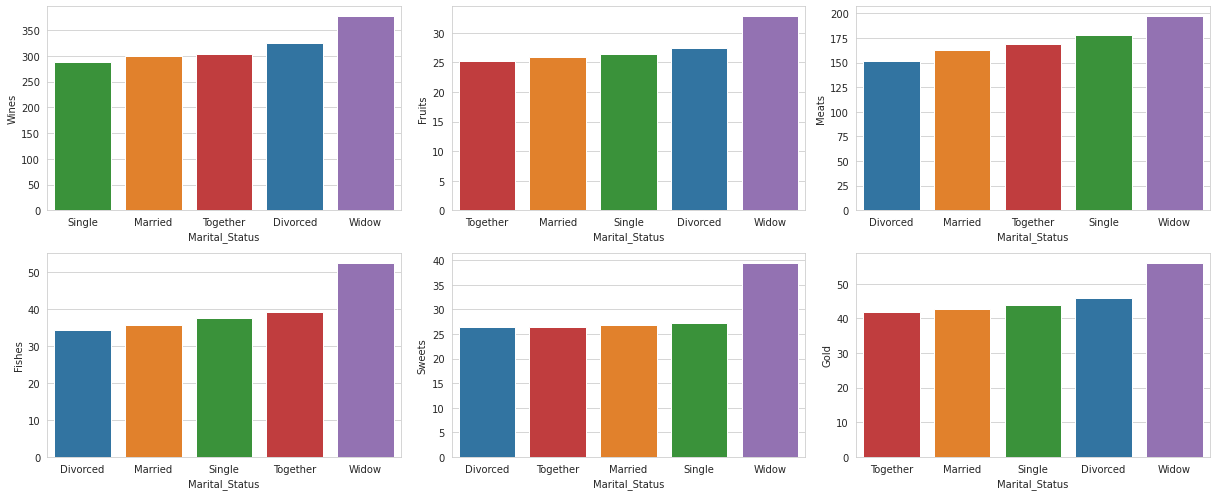

In [563]:
plt.figure(figsize=(17,7))
for (i, col) in enumerate(marital_df[['Wines','Fruits','Meats','Fishes','Sweets','Gold']]):
    plt.subplot(2,3,i+1)
    sns.barplot(x='Marital_Status', y=col, data=marital_df, palette=marital_color_map, order=marital_df.sort_values(col).Marital_Status)
plt.tight_layout()

In [565]:
edu_df = data.groupby('Education')[['Wines','Fruits','Meats','Fishes','Sweets','Gold', 'Total_Amount']].mean().round(2).reset_index()
edu_df

,Education,Wines,Fruits,Meats,Fishes,Sweets,Gold,Total_Amount
0,2n Cycle,200.76,28.82,139.51,45.34,34.42,45.53,494.36
1,Basic,7.80,11.20,11.82,17.73,12.61,22.76,83.92
2,Graduation,284.63,31.18,182.05,43.51,31.76,50.30,623.44
3,Master,332.74,21.95,162.92,32.22,21.44,40.27,611.53
4,PhD,401.49,18.85,167.54,25.70,19.84,31.97,665.39


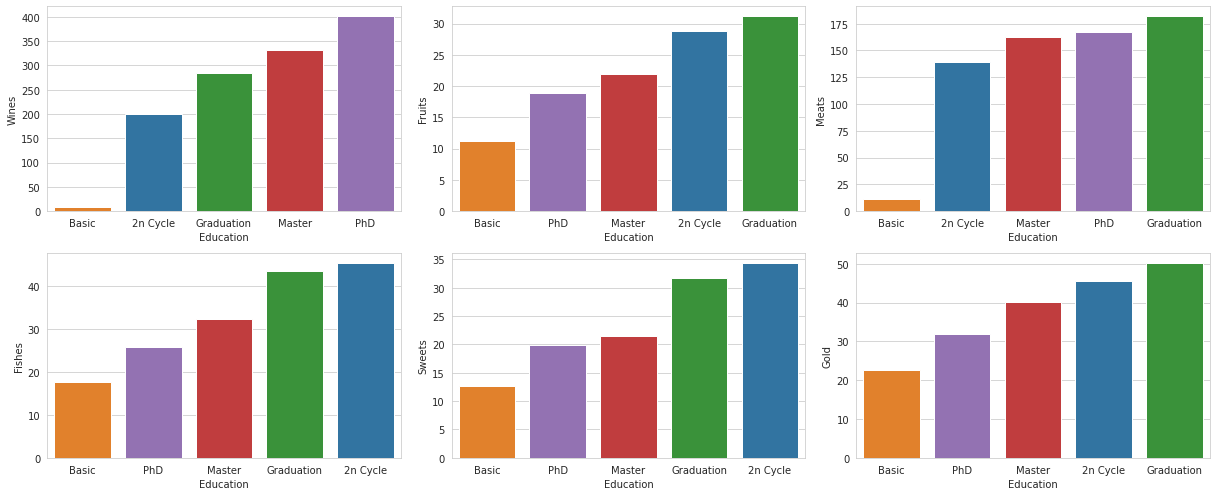

In [567]:
plt.figure(figsize=(17,7))
for (i, col) in enumerate(edu_df.columns[1:7]):
    plt.subplot(2,3,i+1)
    sns.barplot(x='Education', y=col, data=edu_df, palette=edu_color_map, order=edu_df.sort_values(col).Education)
plt.tight_layout()

In [568]:
age_df = data.groupby('Age_Group')[['Wines','Fruits','Meats','Fishes','Sweets','Gold', 'Total_Amount']].mean().round(2).reset_index()
age_df

,Age_Group,Wines,Fruits,Meats,Fishes,Sweets,Gold,Total_Amount
0,16-29,246.42,29.93,192.23,38.97,30.06,45.23,582.84
1,30-39,244.33,23.80,146.55,34.72,25.25,38.88,513.54
2,40-49,298.22,24.91,155.84,33.48,25.53,42.28,580.25
3,50-59,367.54,28.27,181.04,41.36,28.80,47.94,694.96
4,60+,385.56,28.29,197.48,43.78,30.52,47.80,733.43


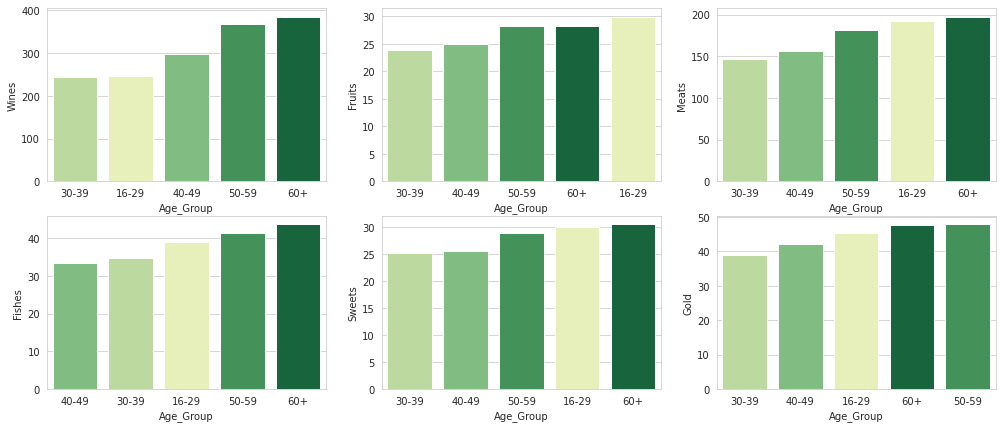

In [569]:
plt.figure(figsize=(17,7))
for (i, col) in enumerate(age_df.columns[1:7]):
    plt.subplot(2,3,i+1)
    sns.barplot(x='Age_Group', y=col, data=age_df, palette=age_color_map, order=age_df.sort_values(col).Age_Group)

In [570]:
kid_df = data.groupby('Kidhome')[['Wines','Fruits','Meats','Fishes','Sweets','Gold', 'Total_Amount']].mean().round(2).reset_index()
kid_df

,Kidhome,Wines,Fruits,Meats,Fishes,Sweets,Gold,Total_Amount
0,0,452.51,39.36,255.64,55.92,40.74,59.26,903.44
1,1,103.26,8.57,49.20,12.28,9.11,22.49,204.91
2,2,64.35,7.42,32.88,8.07,5.16,17.79,135.67


In [572]:
teen_df = data.groupby('Teenhome')[['Wines','Fruits','Meats','Fishes','Sweets','Gold', 'Total_Amount']].mean().round(2).reset_index()
teen_df

,Teenhome,Wines,Fruits,Meats,Fishes,Sweets,Gold,Total_Amount
0,0,304.53,33.23,228.02,47.82,33.75,44.46,691.81
1,1,299.44,18.94,102.26,26.22,20.53,42.47,509.87
2,2,362.82,17.92,127.86,24.56,16.34,45.56,595.06


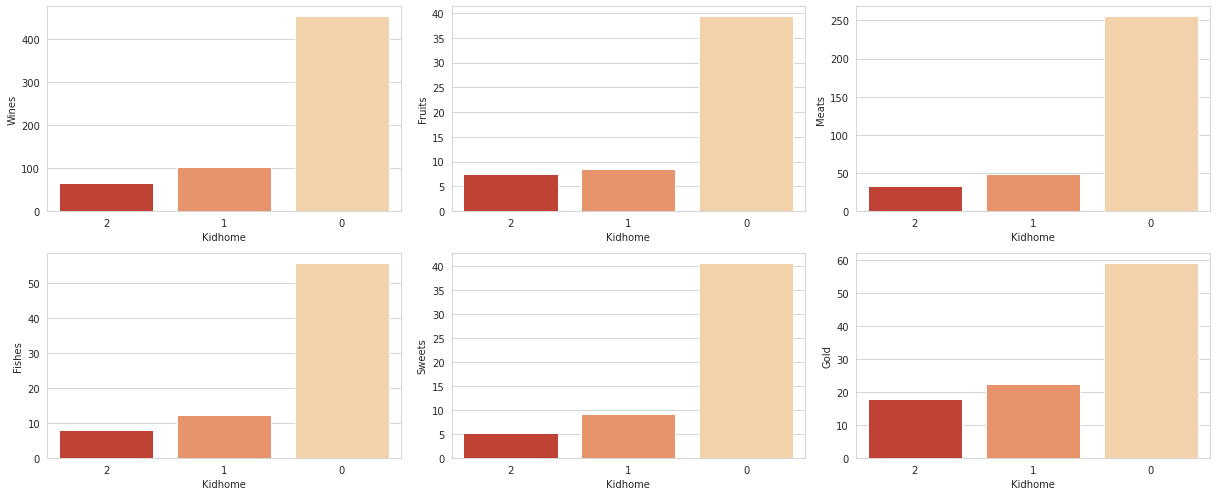

In [571]:
plt.figure(figsize=(17,7))
for (i, col) in enumerate(kid_df.columns[1:7]):
    plt.subplot(2,3,i+1)
    sns.barplot(x='Kidhome', y=col, data=kid_df, palette=kid_color_map, order=kid_df.sort_values(col).Kidhome)
plt.tight_layout()

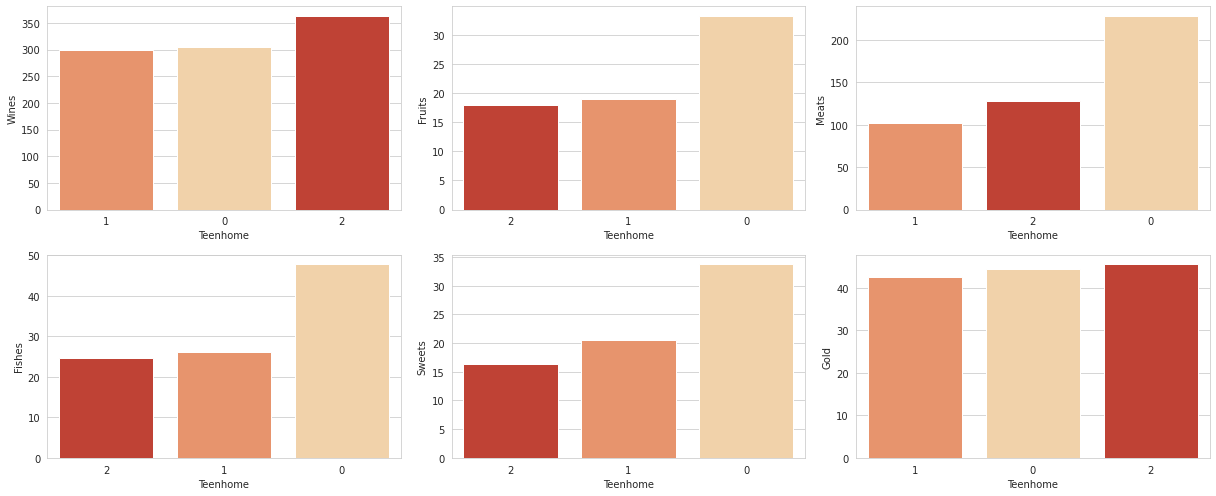

In [573]:
plt.figure(figsize=(17,7))
for (i, col) in enumerate(teen_df.columns[1:7]):
    plt.subplot(2,3,i+1)
    sns.barplot(x='Teenhome', y=col, data=teen_df, palette=kid_color_map, order=teen_df.sort_values(col).Teenhome)
plt.tight_layout()

In [583]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Enrollment_Date', 'Recency', 'Wines', 'Fruits', 'Meats',
       'Fishes', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Enrollment_Age',
       'Total_Amount', 'Total_Purchases', 'Total_Accepted', 'Age_Group'],
      dtype='object')

In [587]:
purchases_pie = data.loc[:,['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum(axis=0).reset_index()
purchases_pie.rename(columns={'index':'Purchases', 0:'Total'}, inplace=True)
purchases_pie

,Purchases,Total
0,NumWebPurchases,8330
1,NumCatalogPurchases,5397
2,NumStorePurchases,11736


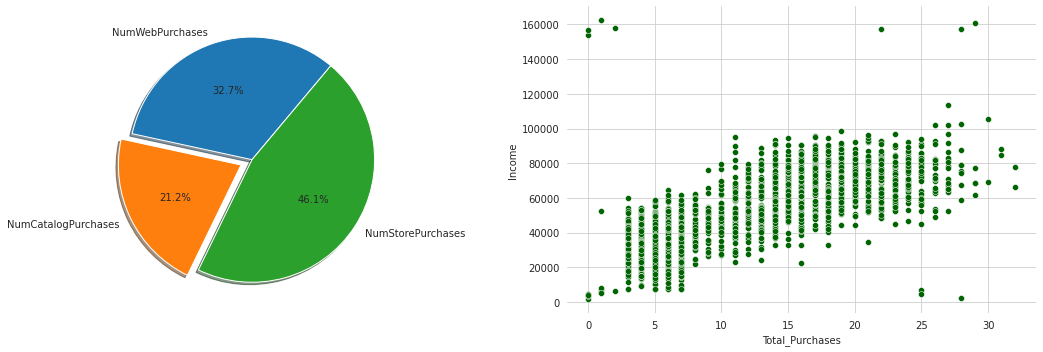

In [611]:
plt.figure(figsize=(15,5))
plt.subplot(121)
explode=(0,0.1,0)
plt.pie(purchases_pie['Total'], labels=purchases_pie['Purchases'], shadow=True, explode=explode, startangle=50, autopct='%1.1f%%')

plt.subplot(122)
sns.scatterplot(data=data, x='Total_Purchases', y='Income', color='darkgreen')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.tight_layout()

In [648]:
purchases_df = data.groupby('Marital_Status')[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'Total_Purchases']].mean().reset_index()

In [714]:
np.sort(data['Age_Group'].unique())

array(['16-29', '30-39', '40-49', '50-59', '60+'], dtype=object)

<AxesSubplot:xlabel='Total_Purchases', ylabel='Density'>

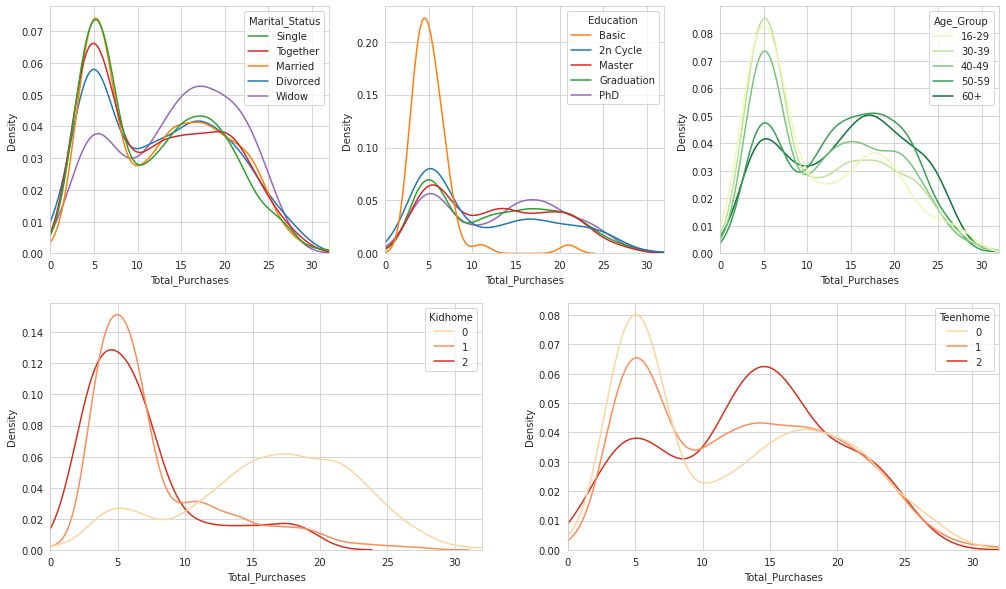

In [715]:
fig = plt.figure(figsize=(17,10))

ax1 = fig.add_subplot(231, xlim=[0,32] )
sns.kdeplot(data=data, x='Total_Purchases', hue='Marital_Status', palette=marital_color_map, bw_adjust=0.8,  common_norm=False)

ax2 = fig.add_subplot(232, sharex=ax1)
sns.kdeplot(data=data, x='Total_Purchases', hue='Education', hue_order=['Basic','2n Cycle', 'Master', 'Graduation', 'PhD']\
            , palette=edu_color_map, bw_adjust=0.8, common_norm=False)

ax3 = fig.add_subplot(233, sharex=ax1)
sns.kdeplot(data=data, x='Total_Purchases', hue='Age_Group', hue_order=np.sort(data['Age_Group'].unique()), palette=age_color_map, bw_adjust=0.8, common_norm=False)

ax4 = fig.add_subplot(223, sharex=ax1)
sns.kdeplot(data=data, x='Total_Purchases', hue='Kidhome', palette=kid_color_map, bw_adjust=0.8, common_norm=False)

ax5 = fig.add_subplot(224, sharex=ax1)
sns.kdeplot(data=data, x='Total_Purchases', hue='Teenhome', palette=kid_color_map, bw_adjust=0.8, common_norm=False)

In [716]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Enrollment_Date', 'Recency', 'Wines', 'Fruits', 'Meats',
       'Fishes', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Enrollment_Age',
       'Total_Amount', 'Total_Purchases', 'Total_Accepted', 'Age_Group'],
      dtype='object')

In [738]:
cmp_df = data[[ 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=0).reset_index()
cmp_df.rename(columns={'index':'Campaign', 0:'Number of Customers'}, inplace=True)

<AxesSubplot:xlabel='Total_Accepted', ylabel='Income'>

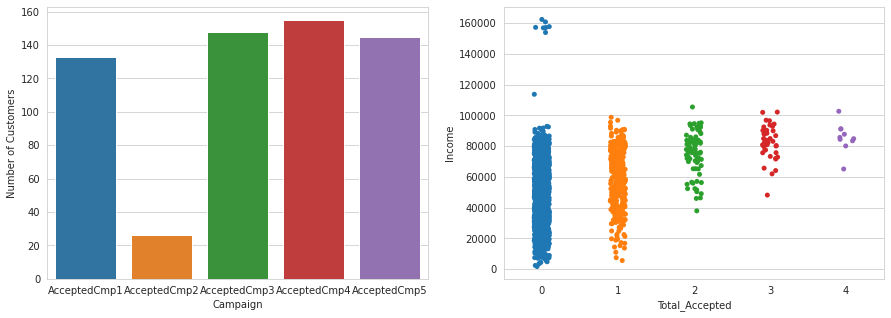

In [909]:
fig = plt.figure(figsize=(15,5))
sns.set_style('whitegrid')

ax1 = fig.add_subplot(121)
sns.barplot(x='Campaign', y='Number of Customers', data=cmp_df)

ax2 = fig.add_subplot(122)
sns.stripplot(x='Total_Accepted', y='Income', data=data)

# plt.tight_layout()
# plt.show()

<AxesSubplot:xlabel='NumDealsPurchases', ylabel='NumWebVisitsMonth'>

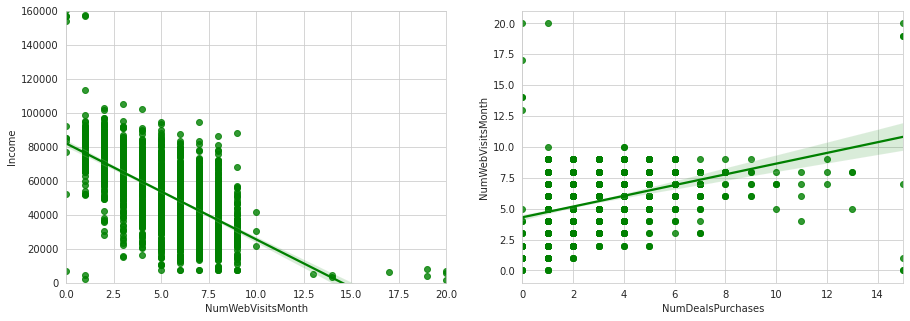

In [906]:
plt.figure(figsize=(15,5))
                   
plt.subplot(121)
ax1 = sns.regplot(x='NumWebVisitsMonth', y='Income', data=data, color='g')
ax1.set(ylim=(0,160000))

plt.subplot(122)
sns.regplot(x='NumDealsPurchases', y='NumWebVisitsMonth', data=data, color='g')

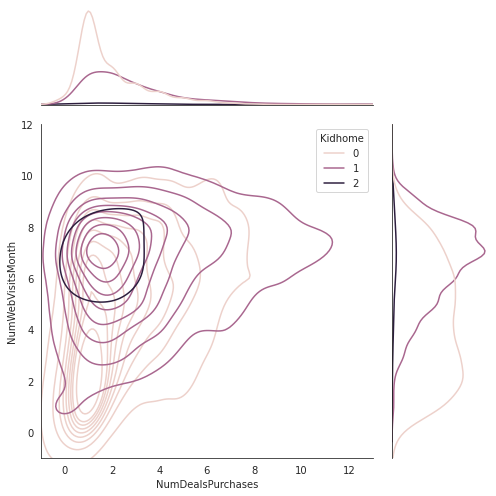

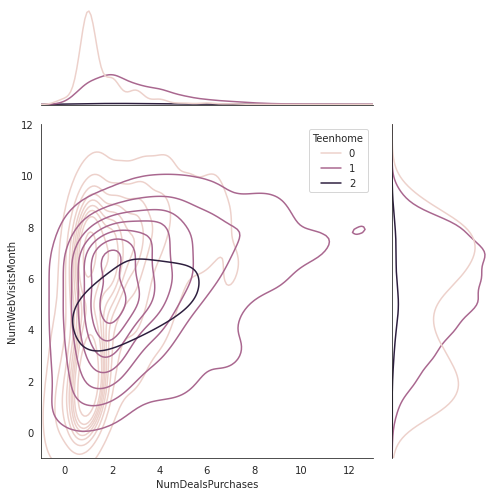

In [925]:
with sns.axes_style('white'): 
    sns.jointplot(y='NumWebVisitsMonth', x='NumDealsPurchases', data=data, hue='Kidhome', kind='kde', xlim=[-1,13], ylim=[-1,12], height=7, ratio=3)
    sns.jointplot(y='NumWebVisitsMonth', x='NumDealsPurchases', data=data, hue='Teenhome', kind='kde', xlim=[-1,13], ylim=[-1,12], height=7, ratio=3)